# Support Vector Machine

    - Supervised learning method
    - Used for Classification (Both Single and Multi-Class), Regression and Outlier Detection

In [ ]:
from dataPrep import prepData
from visualize import plotIt
from sklearn import svm

In [2]:
import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl
%matplotlib inline

In [3]:
features_train, labels_train, features_test, labels_test = prepData()

#### Kernel = "linear" and all other parameters default

It will lead to a smooth classifying boundary

In [4]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")

Fitting the classifier and predicting the test values

In [5]:
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)

Plotting Linear Kernel Classification boundary

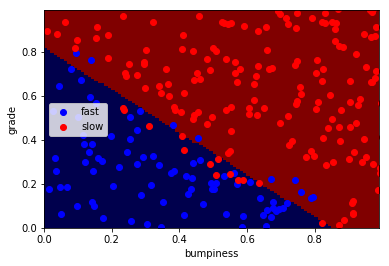

In [6]:
plotIt(clf, features_test, labels_test)

#### Checking accuracy for Linear Kernel

In [7]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)

print (acc*100)

92.0


#### Setting Parameters
    Kernel = linear
    gamma = 1000 - High Gamma
    
#### High gamma doesn't have much effect on the linear kernel for SVM

# Gamma
Gamma determines how far the influence of a single training example reaches

#### Low Gamma value 
means that far reaching training examples are going to influence how decision boundary is placed

#### High Gamma value 
means that the training examples closer to decision boundary are going to have more influence, which also means that SVM algo will effectively ignore some of the points that fall little bit further away from the decision boundary itself.

The reason why it matters that esp. for high values of gamma you could end up with fairly wiggly decision boundary. 

If we have low value of gamma, training points near the decision boundary have comparatively low weights as compared to the faraway points as faraway points also influence the decision boundary. That ends up making the decision boundary a little bit more linear, and smoother. 

In [8]:
clf = SVC(kernel="linear",gamma=1000.0)

In [9]:
clf.fit(features_train,labels_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1000.0, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)

Plotting Linear Kernel Classification boundary with high gamma

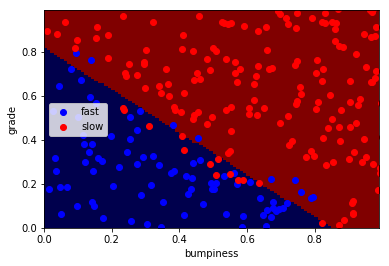

In [11]:
plotIt(clf, features_test, labels_test)

Checking Accuracy for high Gamma and Linear kernel

In [12]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)

print (acc*100)

92.0


#### Setting Parameters
    Kernel = rbf
    gamma = 1000 - High Gamma
    C = 2.12
    
#### High gamma doesn't have much effect on the rbf kernel for SVM but C makes the boundary to fit more training points

In [13]:
clf = SVC(C=2.121,kernel="rbf",gamma=1000.0)

In [14]:
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)

Plotting Linear Kernel Classification boundary with high gamma and higher C

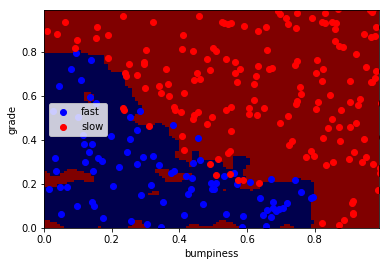

In [15]:
plotIt(clf, features_test, labels_test)

### Overfitting
Seeing the above plot, it seems to be prone to overfitting as the decision boundary is pretty wiggly and we can also see red clusters within the blue area which indicates that the training points are being classified too tightly

#### Accuracy

Checking Accuracy for RBF kernel, high C and high Gamma

C of ~2.1 gives an improvement of 1.2% in accuracy

In [16]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)

print (acc*100)

93.2


# Strengths of SVM
    - Effective in high dimensional spaces
    - Effective in cases where number of dimensions is greater than number of samples
    - Memory efficient as it uses a subset of training points 
    - Versatile, different kernel functions are available

# Disadvantages of SVM
    - Prone to overfitting, in order to avoid overfitting parameter tuning (esp. kernel, C, and gamma) 
    and regularization is crucial
    - SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold 
    cross-validation
    - Naive Bayes is great for text--it’s faster and generally gives better performance than an SVM for this
    particular problem

# Computation Requirements

    - Support Vector Machines are powerful tools, but their compute and storage requirements increase rapidly 
    with the number of training vectors. 
    - The core of an SVM is a quadratic programming problem (QP), separating support vectors from the rest of 
    the training data. 
    - The QP solver used by this libsvm-based implementation scales between O(n-features * (n-samples)^2) and 
    O(n-features * (n-samples)^3).
    
####    So the training time for a typical SVM implementation happens to be cubic in size of the data set

# Tips and Tricks

### Speed-Accuracy-Tradeoff

If speed is a major consideration (and for many real-time machine learning applications, it certainly is) then you may want to sacrifice a bit of accuracy if it means you can train/predict faster.

e.g. the training data might be reduced

        features_train = features_train[:len(features_train)/100] 
        labels_train = labels_train[:len(labels_train)/100] 
